## Deuxième Partie : Classification




#### Importation des Packages

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd # Pour la manipulation de données tabulaires
import numpy as np # Pour les opérations numériques
import matplotlib.pyplot as plt # Pour la création de graphiques
import seaborn as sns # Pour la visualisation de données avancée

import nltk  # Bibliothèque de traitement du langage naturel

# Importation d'un sous-module de NLTK pour l'analyse de sentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Importation de corpus et de modules de NLTK pour le prétraitement de texte
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Importation de modules scikit-learn pour la préparation des données
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import re    # Pour les expressions régulières
import string  # Pour les opérations de chaînes de caractères
import os    # Pour les opérations de système de fichiers
import time  # Pour le suivi du temps d'exécution

# Les lignes suivantes sont actuellement en commentaire
# Elles importent des bibliothèques qui ne sont pas utilisées dans ce code particulier.
# from wordcloud import WordCloud
# from wordcloud import STOPWORDS 

# Importation de modules scikit-learn pour la préparation des données
from sklearn.preprocessing import LabelEncoder  # Pour l'encodage des étiquettes
from sklearn.manifold import TSNE  # Pour la réduction de dimension t-SNE
from gensim.models import word2vec   # Pour la création de modèles word2vec
from sklearn.cluster import KMeans  # Pour l'apprentissage non supervisé KMeans

import warnings   # Pour ignorer les avertissements pendant l'exécution
warnings.filterwarnings('ignore')

#### Chargement des datasets
Nous allons importer l'ensemble des jeux de données afin de visualiser leurs principales informations :

In [2]:
# Lecture du fichier CSV 'my_df.csv' et stockage des données dans un DataFrame (df)
df = pd.read_csv('my_df.csv')
# Affichage du DataFrame (df)
df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,brand,product_specifications,categorie,categorie2,res,clean_description,res_clean,labels
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,230,key feature elegance polyester multicolor abst...,152,4
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,74,specification sathiyas cotton bath towel bath ...,62,0
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Baby Bath & Skin,215,key feature eurospa cotton terry face towel se...,154,0
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen,145,key feature santosh royal fashion cotton print...,114,4
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Bed Linen,214,key feature jaipur print cotton floral king si...,153,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby & Kids Gifts,431,oren empower extra large self adhesive sticker...,226,0
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby & Kids Gifts,303,wallmantra large vinyl sticker sticker pack pr...,154,0
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00

### Text Features Extraction (CountVectorizer and TfidfVectorizer)

In [3]:
# Extraire les catégories uniques de la colonne 'categorie' du DataFrame 'df'
l_cat = list(set(df['categorie']))
# Créer une liste 'y_cat_num' contenant des numéros pour chaque catégorie
y_cat_num = [(1-l_cat.index(df.iloc[i]['categorie'])) for i in range(len(df))]

In [4]:
# Création de la liste 'l_cat' qui contient toutes les catégories uniques
l_cat

['Baby Care',
 'Home Furnishing',
 'Beauty and Personal Care',
 'Computers',
 'Home Decor & Festive Needs',
 'Kitchen & Dining',
 'Watches']

In [5]:
# Importation de la bibliothèque 'time' pour la mesure du temps
import time
# Importation de modules scikit-learn pour le clustering et la réduction de dimension
from sklearn import cluster, metrics
from sklearn import manifold, decomposition

# Fonction pour calculer t-SNE, déterminer les clusters et calculer l'indice ARI
def ARI_fct(features) :
    # Mesure du temps au début de la fonction
    time1 = time.time()
    num_labels=len(l_cat) # Nombre de catégories
    
    # Calcul de t-SNE
    tsne = manifold.TSNE(n_components=2,
                         perplexity=30, 
                         n_iter=2000, 
                         init='random',
                         learning_rate=200, 
                         random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après t-SNE
    cls = cluster.KMeans(n_clusters=num_labels, 
                         n_init=100, 
                         random_state=42)
    cls.fit(X_tsne)
    
    # Calcul de l'indice ARI entre les vraies catégories (y_cat_num) et les clusters
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    # Mesure du temps écoulé
    time2 = np.round(time.time() - time1,0)
    # Affichage de l'indice ARI et du temps écoulé
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# Fonction pour visualiser les résultats t-SNE
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
# Sous-figure 1 : Représentation des produits par catégories réelles    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],
                         X_tsne[:,1],
                         c=y_cat_num,
                         cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0],
              labels=l_cat,
              loc="best",
              fontsize=6.5, 
              title="Categorie")
   

    plt.title('Représentation des produits par catégories réelles')
    
# Sous-figure 2 : Représentation des produits par clusters    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],
                         X_tsne[:,1],
                         c=labels,
                         cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0],
              labels=set(labels),
              loc="best",
              fontsize=6.5,
              title="Clusters")
    
    plt.title('Représentation des produits par clusters')
    
    plt.show()
    print("ARI : ", ARI)
   

#### - Bag of words

In [6]:
# Importation des modules nécessaires de scikit-learn pour le BoW
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Création d'une instance de CountVectorizer
cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)

# Sélection de la colonne de texte 'clean_description' à partir du DataFrame 'df'
feat = 'clean_description'
# Adapter (fit) le CountVectorizer aux données de la colonne 'clean_description' pour créer le vocabulaire
cv_fit = cvect.fit(df[feat])

# Transformer les données de la colonne 'clean_description' en une matrice BoW
cv_transform = cvect.transform(df[feat])  

In [7]:
# Afficher la forme (shape) de la matrice résultante après transformation avec le CountVectorizer.
cv_transform.shape

(1050, 4542)

In [8]:
# Imprime le message "CountVectorizer : " pour indiquer l'opération en cours
print("CountVectorizer : ")
# Appelle la fonction ARI_fct avec la matrice cv_transform comme argument
# La fonction calcule l'indice ARI, 
ARI, X_tsne, labels = ARI_fct(cv_transform)

CountVectorizer : 
ARI :  0.4597 time :  13.0


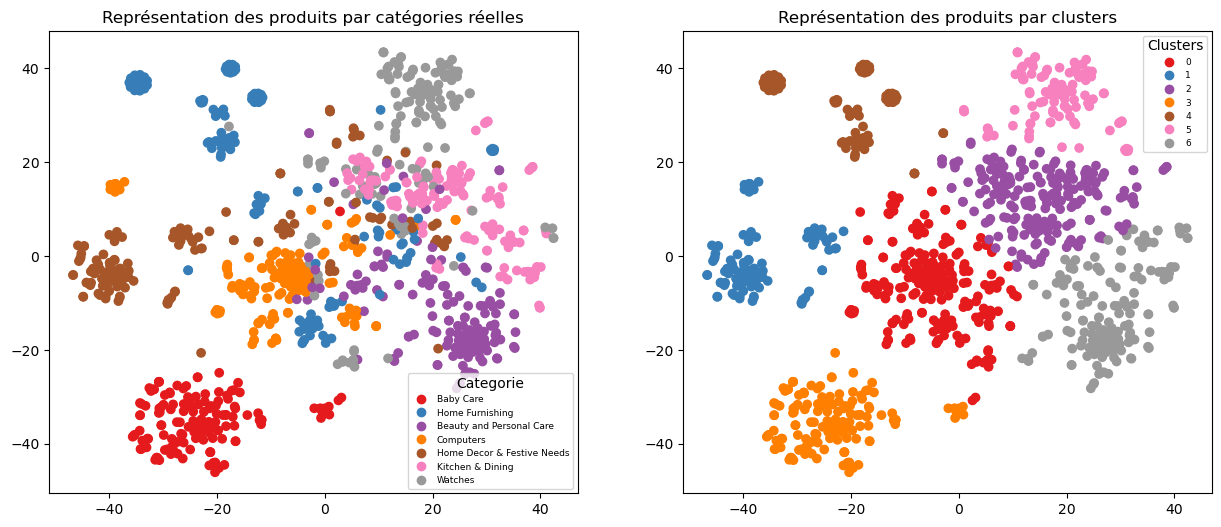

ARI :  0.4597


In [9]:
# Appelle la fonction TSNE_visu_fct avec les paramètres suivants 
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

#### - TF IDF

In [10]:
# Création d'une instance de TfidfVectorizer
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

# Adapter (fit) le TfidfVectorizer aux données de la colonne 'clean_description' pour créer le vocabulaire
ctf_fit = ctf.fit(df[feat])
# Transformer les données de la colonne 'clean_description' en une matrice TF-IDF
ctf_transform = ctf.transform(df[feat]) 

In [11]:
# Afficher la forme (shape) de la matrice résultante après transformation avec le TfidfVectorizer.
cv_transform.shape

(1050, 4542)

In [12]:
# Imprime le message "Tf-idf : " pour indiquer l'opération en cours
print("Tf-idf : ")
# Appelle la fonction ARI_fct avec la matrice ctf_transform (TF-IDF transformée) comme argument
# La fonction calcule l'indice ARI,
ARI, X_tsne, labels = ARI_fct(ctf_transform)

Tf-idf : 
ARI :  0.437 time :  13.0


In [13]:
# Renvoie la forme (shape) de la matrice résultante après la réduction de dimension t-SNE.
X_tsne.shape

(1050, 2)

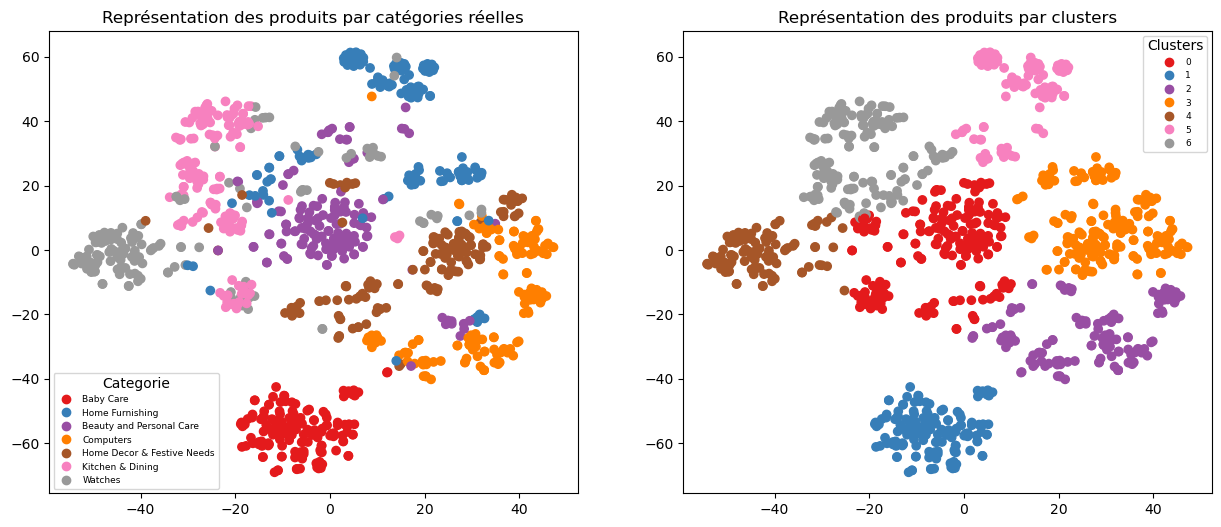

ARI :  0.437


In [14]:
# Appelle la fonction TSNE_visu_fct avec les paramètres suivants
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### Classifieurs non supervisés sur données textuelles
#### - ACP

In [15]:
from sklearn.decomposition import PCA
# Transformation des descriptions textuelles en vecteurs TF-IDF denses.
X =  ctf.transform(df[feat]).todense()

In [16]:
from sklearn.preprocessing import StandardScaler
# Prétraitement des données textuelles pour réduire les dimensions.
ss = StandardScaler() # Crée une instance de StandardScaler, un transformateur qui standardise les caractéristiques
X = np.asarray(X) # Convertit la matrice de données 'X' en un tableau numpy (numpy array) pour qu'elle puisse être utilisée
X = ss.fit_transform(X) # Utilise l'objet 'ss_nlp' pour standardiser les données dans 'X'. Cela signifie que chaque colonne

pca = PCA() # Crée une instance de PCA (Analyse en Composantes Principales), une technique de réduction de dimension
pca.fit(X) #   Ajuste le modèle PCA aux données standardisées 'X'. Cela calcule les composantes principales qui
#   permettront de réduire la dimension des données tout en préservant l'information importante.
print(X.shape)

(1050, 4542)


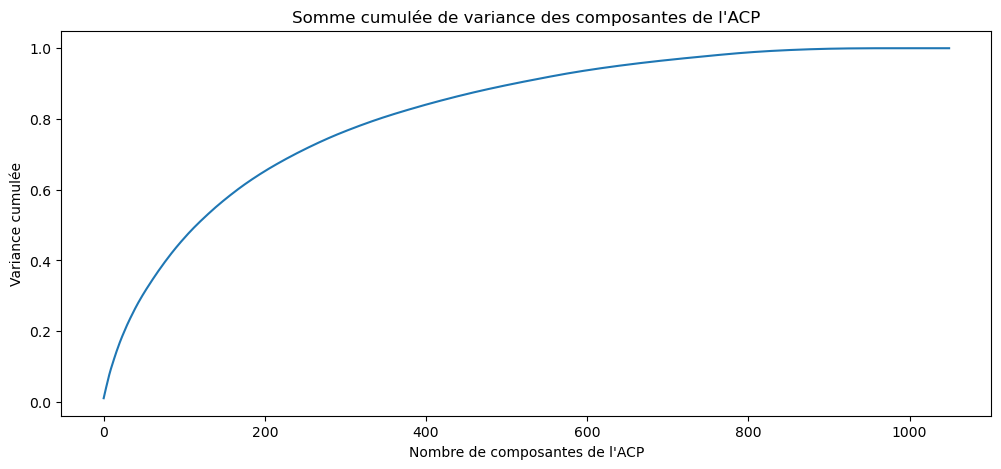

In [17]:
# Crée une nouvelle figure pour le tracé du graphique en définissant sa taille (12 pouces de largeur x 5 pouces de hauteur).
plt.figure(figsize=(12,5))
plt.title('Somme cumulée de variance des composantes de l\'ACP')
plt.xlabel('Nombre de composantes de l\'ACP')
plt.ylabel('Variance cumulée')
plt.plot(list(range(X.shape[0])),
         np.cumsum(pca.explained_variance_ratio_))

In [18]:
# Réduction de la dimension des données en conservant 80 % de la variance expliquée.
sum_pca = np.cumsum(pca.explained_variance_ratio_)
for counter, value in enumerate(sum_pca):
    if value > 0.80:
        X_reduce = pca.transform(X)[:,:counter]
        break

In [19]:
# Affichage du nombre de caractéristiques (features) conservées et de la variance expliquée.
print('nombre de features : {}, variance : {}'.format(counter+1,np.cumsum(pca.explained_variance_ratio_)[counter]))

nombre de features : 343, variance : 0.800584325878013


In [20]:
# Affichage des dimensions de la matrice de données réduite
X_reduce.shape

(1050, 342)

In [21]:
# Sauvegarde de la matrice de données réduite 'X_reduce' au format CSV.
np.save('df_saved/X_reduce.csv', X_reduce)

In [22]:
from ipywidgets import IntProgress
from ipywidgets import Text
from IPython.display import display
import time
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [23]:
# Initialisation des dictionnaires et des variables pour l'analyse K-Means.

#   Crée un dictionnaire vide 'dict_kmeans_nlp' qui sera utilisé pour stocker les modèles K-Means
#   avec différents nombres de clusters.
dict_kmeans = {} 
#   Crée un dictionnaire vide 'inertia_nlp' qui sera utilisé pour stocker les valeurs d'inertie pour
#   chaque modèle K-Means.
inertia = {} 
#   Définit le nombre maximal de clusters à explorer lors de l'analyse K-Means. Dans ce cas, la plage
#   de clusters va de 1 à 'max_clusters_nlp' - 1.
max_clusters= 7 

#   Crée une barre de progression 'f' qui sera utilisée pour suivre l'avancement de l'analyse K-Means.
#   Elle affiche le progrès de 1 à 'max_clusters_nlp' clusters.
f = IntProgress(min=1, max=max_clusters) 
#   Crée une chaîne de caractères 'chaine' qui affiche la progression actuelle dans le format "1/100"
#   (ou le nombre maximal de clusters spécifié).
chaine = str(1)+'/'+str(max_clusters)
#   Crée un widget texte 'g' pour afficher la progression en cours.
g = Text(value=chaine)
#   Affiche la barre de progression 'f'.
display(f)
#   Affiche le widget texte 'g'.
display(g)
# La boucle 'for' suivante effectue une analyse K-Means en itérant sur différents nombres de clusters
# de 1 à 'max_clusters_nlp' - 1. Elle calcule l'inertie pour chaque modèle K-Means et stocke les modèles
# dans 'dict_kmeans_nlp'. La barre de progression 'f' est mise à jour à chaque itération pour suivre
# l'avancement.
for k in range(1,max_clusters):
    kmeans = KMeans(n_clusters=k,
                   verbose=1,
                   random_state=0,).fit(X_reduce)
    inertia[k] = kmeans.inertia_
    dict_kmeans[k] = kmeans
    f.value = k 
    g.value =str(k)+'/'+str(max_clusters)

IntProgress(value=1, max=7, min=1)

Text(value='1/7')

Initialization complete
Iteration 0, inertia 4130470.0377018414.
Iteration 1, inertia 3814437.217395566.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4003882.499788209.
Iteration 1, inertia 3814437.217395566.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 21821480.19355136.
Iteration 1, inertia 3814437.217395566.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4012267.9691490512.
Iteration 1, inertia 3814437.217395566.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6824498.290155589.
Iteration 1, inertia 3814437.217395566.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3885912.8049907284.
Iteration 1, inertia 3814437.217395566.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6006386.1174063105.
Iteration 1, inertia 3814437.217

<Axes: title={'center': 'Kmeans: Comparaison de la somme des inerties en fonction du nombre de clusters'}>

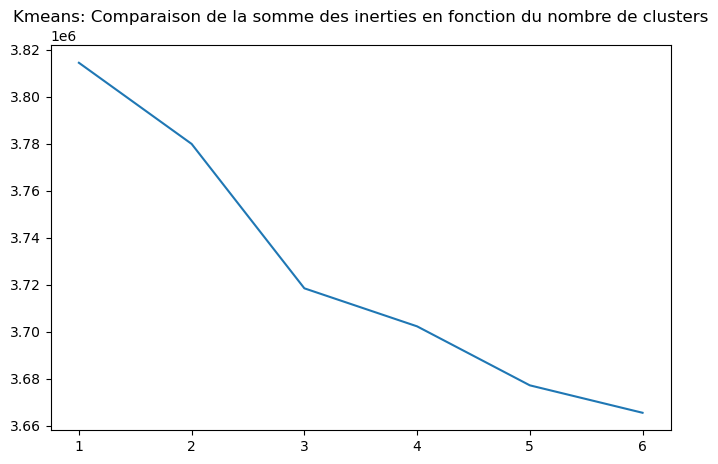

In [24]:
# Tracé d'un graphique pour comparer l'inertie en fonction du nombre de clusters.
plt.figure(figsize=(8, 5))
plt.title('Kmeans: Comparaison de la somme des inerties en fonction du nombre de clusters')
sns.lineplot(x=list(inertia.keys()), y=list(inertia.values()))

- Calcul du coefficient de silhouette moyen en fonction du nombre de clusters (kmeans) et tracé d'un graphique.

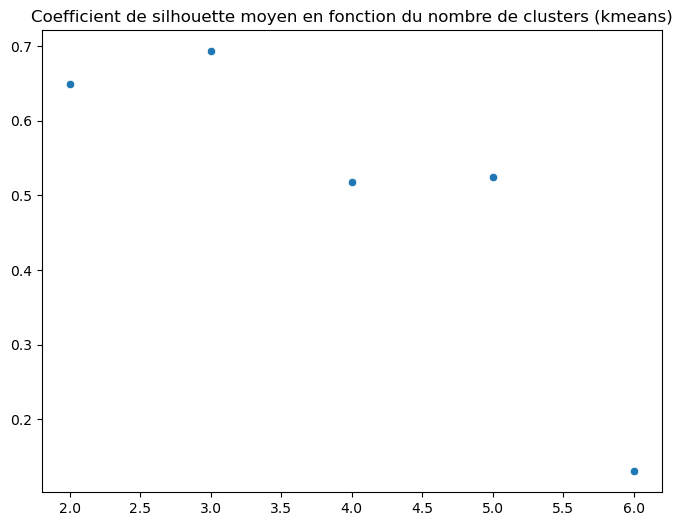

In [25]:
from sklearn.metrics import silhouette_score
#   Crée un dictionnaire vide 'silhouettes_kmeans_nlp' qui sera utilisé pour stocker les coefficients de silhouette
#   moyens pour différents nombres de clusters.
silhouettes_kmeans = {}
for i in range(2,max_clusters):
    silhouettes_kmeans[i] = silhouette_score(X = X_reduce,
                                             labels= list(dict_kmeans[i].labels_))

plt.figure(figsize=(8,6)),
plt.title('Coefficient de silhouette moyen en fonction du nombre de clusters (kmeans)')
sns.scatterplot(x = list(silhouettes_kmeans.keys()),
               y = list(silhouettes_kmeans.values()))
plt.show()

In [26]:
# Sélection du nombre optimal de clusters basé sur le coefficient de silhouette.
# Cette boucle 'for' parcourt les éléments du dictionnaire 'silhouettes_kmeans_nlp', qui contient les coefficients de silhouette
# moyens pour différents nombres de clusters. Elle cherche le nombre de clusters qui donne le coefficient de silhouette maximum.
for key, value in silhouettes_kmeans.items():
    if value == max(silhouettes_kmeans.values()):
        print('le coefficient de silhouette est maximal pour {} clusters (score = {})'.format(key, value))
        nb_clusters = key

le coefficient de silhouette est maximal pour 3 clusters (score = 0.6930752516346764)


##  Embeddings

### - Word2Vec

In [27]:
# Importation de TensorFlow, une bibliothèque d'apprentissage automatique développée par Google
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

2023-10-03 13:30:14.209782: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Création du modèle

In [28]:
# Définition de la dimension des vecteurs Word2Vec (300 dimensions)
w2v_size=300
w2v_window=5  # Définition de la fenêtre contextuelle (window) pour Word2Vec (5 mots à gauche et 5 mots à droite)
w2v_min_count=1 # Définition du nombre minimum d'occurrences d'un mot pour être inclus dans le modèle Word2Vec
w2v_epochs=100 # Définition du nombre d'itérations d'entraînement du modèle Word2Vec
maxlen = 24  # Définition de la longueur maximale des phrases

# Extraction des descriptions nettoyées depuis un DataFrame 'df' et les convertir en une liste de phrases
sentences = df['clean_description'].to_list() 
# Prétraitement des phrases : division en mots (tokenization) et nettoyage
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [29]:
# Création et entraînement du modèle Word2Vec

# Création d'une instance du modèle Word2Vec avec les paramètres spécifiés
print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
                                               #workers=multiprocessing.cpu_count())
    
# Construction du vocabulaire à partir des phrases fournies (sentences)
w2v_model.build_vocab(sentences)
# Entraînement du modèle Word2Vec sur les phrases fournies
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
# Extraction des vecteurs de mots du modèle entraîné
model_vectors = w2v_model.wv
# Extraction de la liste des mots du modèle
w2v_words = model_vectors.index_to_key
# Affichage de la taille du vocabulaire (nombre de mots dans le modèle)
print("Vocabulary size: %i" % len(w2v_words))
# Affichage d'un message pour indiquer que l'entraînement est terminé
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 4647
Word2Vec trained


In [30]:
# Préparation des sentences (tokenization)

# Affichage d'un message pour indiquer le début de la préparation des sentences
print("Fit Tokenizer ...")
tokenizer = Tokenizer()  # Création d'une instance de Tokenizer
tokenizer.fit_on_texts(sentences)  # Adaptation du Tokenizer aux sentences pour qu'il puisse construire un vocabulaire
# Conversion des sentences en séquences d'entiers en utilisant le Tokenizer
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen, # Longueur maximale des séquences (padding/troncature)
                                                     padding='post')  # 'post' indique d'ajouter du padding à la fin des séquences

# Calcul du nombre total de mots uniques dans le vocabulaire                                                   
num_words = len(tokenizer.word_index) + 1
# Le "+1" est ajouté car les indices commencent généralement à 1 plutôt qu'à 0.

# Affichage du nombre de mots uniques dans le vocabulaire
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4648


In [31]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300  # Définition de la dimension des vecteurs d'embedding (Word2Vec)
word_index = tokenizer.word_index  # Récupération du dictionnaire de mots créé par le Tokenizer
vocab_size = len(word_index) + 1 # Calcul de la taille du vocabulaire (nombre total de mots uniques)
# Le "+1" est ajouté car les indices commencent généralement à 1 plutôt qu'à 0.

# Création d'une matrice d'embedding initialisée à des zéros
embedding_matrix = np.zeros((vocab_size, w2v_size))

# Initialisation des compteurs pour le suivi
i=0  # Compteur total de mots dans le vocabulaire
j=0  # Compteur de mots pour lesquels un embedding est disponible dans le modèle Word2Vec

# Boucle à travers chaque mot du vocabulaire et son indice
for word, idx in word_index.items():
    i +=1
# Vérification si le mot est présent dans le modèle Word2Vec (dans w2v_words)
    if word in w2v_words:
        j +=1
# Récupération du vecteur d'embedding du mot à partir du modèle Word2Vec
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
# Si un vecteur d'embedding existe pour ce mot, il est copié dans la matrice d'embedding
            embedding_matrix[idx] = model_vectors[word]
# Calcul du taux de mots pour lesquels un embedding a été trouvé dans le modèle            
word_rate = np.round(j/i,4)

# Affichage du taux de mots avec embedding, ainsi que la forme de la matrice d'embedding
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4648, 300)


In [32]:
# Création du modèle d'embedding

# Création d'une entrée pour le modèle d'embedding
input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
# Création d'une entrée séparée pour les mots (peut être utile pour les modèles plus complexes)
word_input=Input(shape=(maxlen,),dtype='float64') 

# Création de la couche d'embedding en utilisant la matrice d'embedding préalablement créée
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)   # Calcul du vecteur d'embedding moyen pour chaque séquence
embed_model = Model([word_input],word_vec) # Création du modèle d'embedding avec les entrées et la couche d'embedding

# Affichage d'un résumé du modèle
embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding (Embedding)       (None, 24, 300)           1394400   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 1,394,400
Trainable params: 1,394,400
Non-trainable params: 0
_________________________________________________________________


#### Exécution du modèle

In [33]:
# Utilisation du modèle d'embedding préalablement créé pour générer des embeddings
embeddings = embed_model.predict(x_sentences)
# Affichage de la forme (shape) des embeddings résultants
embeddings.shape

33/33 [==============================] - 0s 2ms/step


(1050, 300)

In [34]:
# Appel de la fonction ARI_fct avec les embeddings comme argument
ARI, X_tsne, labels = ARI_fct(embeddings)

ARI :  0.2192 time :  13.0


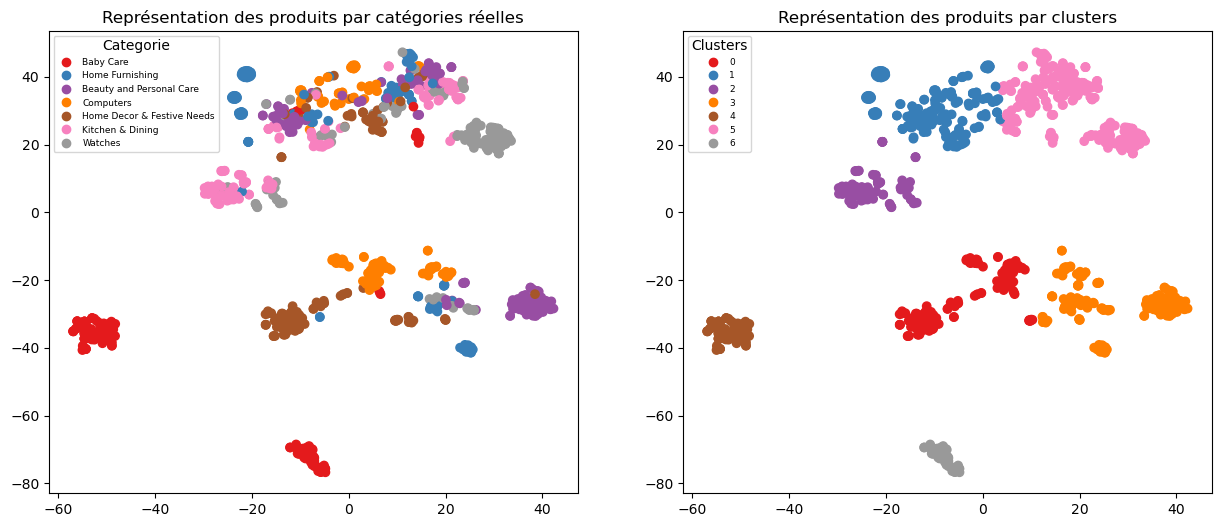

ARI :  0.2192


In [35]:
# Appel de la fonction TSNE_visu_fct avec plusieurs arguments
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### - USE (Universal Sentence Encoder)

In [42]:
# Importe le module tensorflow_hub sous le nom 'hub'
import tensorflow_hub as hub
# Charge le modèle Universal Sentence Encoder à partir de l'URL spécifiée
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

INFO:absl:Using /var/folders/5b/97kkk3b96mjgj39npqqsf5y80000gn/T/tfhub_modules to cache modules.


In [43]:
# Définit une fonction 'feature_USE_fct' qui prend en entrée des phrases et une taille de lot (batch_size)
def feature_USE_fct(sentences, b_size) :
    # Définit la taille du lot (batch_size)
    batch_size = b_size
    # Enregistre le temps de début de l'opération
    time1 = time.time()
# Parcours les phrases par lots
    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size # Calcule l'indice de début du lot
        feat = embed(sentences[idx:idx+batch_size]) # Utilise le modèle USE pour encoder les phrases du lot

        if step ==0 :
            features = feat  # Si c'est le premier lot, initialise les caractéristiques
        else :
            features = np.concatenate((features,feat))  # Sinon, concatène les caractéristiques des lots précédents
# Enregistre le temps écoulé
    time2 = np.round(time.time() - time1,0)
    # Retourne les caractéristiques encodées
    return features

In [44]:
# Définit la taille du lot (batch size) comme 10
batch_size = 10
# Utilise la colonne 'clean_description' du DataFrame df pour créer une liste 'sentences'
sentences = df['clean_description'].to_list()

In [45]:
# Appelle la fonction feature_USE_fct avec les données 'sentences' et la taille du lot 'batch_size'
features_USE = feature_USE_fct(sentences, batch_size)

2023-10-03 13:30:56.044002: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype string
	 [[{{node inputs}}]]


In [46]:
# Appelle la fonction ARI_fct avec les caractéristiques encodées features_USE
# et stocke les résultats dans les variables ARI, X_tsne, et labels
ARI, X_tsne, labels = ARI_fct(features_USE)

ARI :  0.4219 time :  17.0


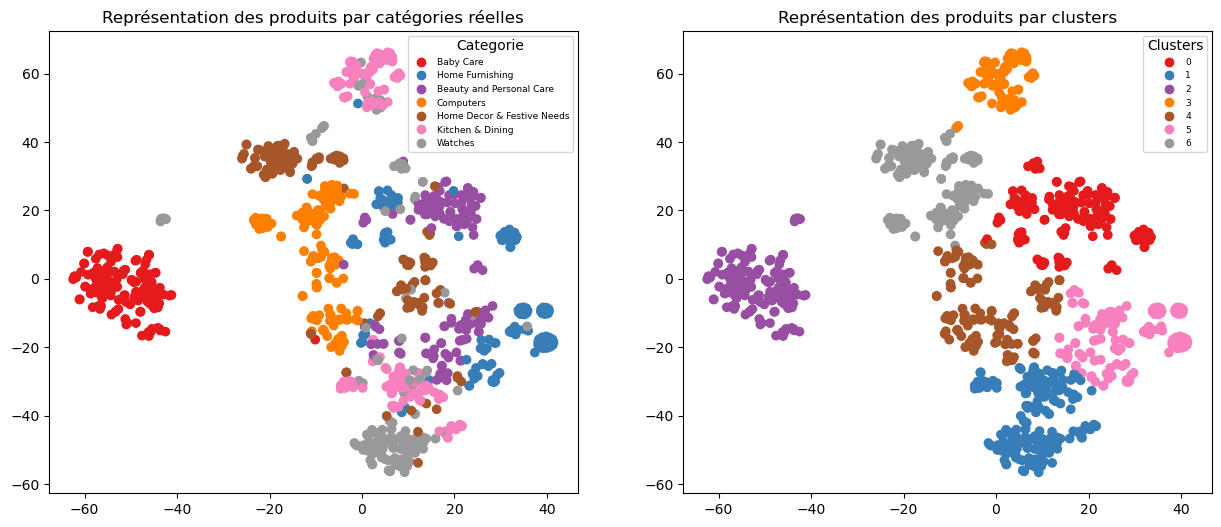

ARI :  0.4219


In [47]:
# Appelle la fonction TSNE_visu_fct avec les arguments X_tsne, y_cat_num, labels et ARI
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

###  Données visuelles
##### - Image Classifier 

In [48]:
# Effectue une copie du DataFrame df
df_img = df.copy()

In [49]:
# Définit le chemin (path) vers le répertoire contenant les images
path = "../Classifiez automatiquement des biens de consommation/Images/" 

# Liste toutes les images dans le répertoire spécifié et les stocke dans la liste 'list_imags'
list_imags = [file for file in os.listdir(path)]
# Affiche le nombre total d'images trouvées
print(len(list_imags))
# Modifie les chemins des images dans la colonne 'image' du DataFrame 'df_img' en ajoutant le chemin 'path'
df_img["image"] = df_img.image.apply(lambda x: path+str(x) )

1050


In [50]:
# Affiche les premières lignes du DataFrame df_img
df_img.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,brand,product_specifications,categorie,categorie2,res,clean_description,res_clean,labels
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,../Classifiez automatiquement des biens de con...,False,...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,230,key feature elegance polyester multicolor abst...,152,4
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,../Classifiez automatiquement des biens de con...,False,...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,74,specification sathiyas cotton bath towel bath ...,62,0
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,../Classifiez automatiquement des biens de con...,False,...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Baby Bath & Skin,215,key feature eurospa cotton terry face towel se...,154,0
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,../Classifiez automatiquement des biens de con...,False,...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen,145,key feature santosh royal fashion cotton print...,114,4
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,../Classifiez automatiquement des biens de con...,False,...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Bed Linen,214,key feature jaipur print cotton floral king si...,153,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,../Classifiez automatiquement des biens de con...,False,...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby & Kids Gifts,431,oren empower extra large self adhesive sticker...,226,0
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,../Classifiez automatiquement des biens de con...,False,...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby & Kids Gifts,303,wallmantra large vinyl sticker sticker pack pr...,154,0
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby 

#### - Exemples d'affichage par label

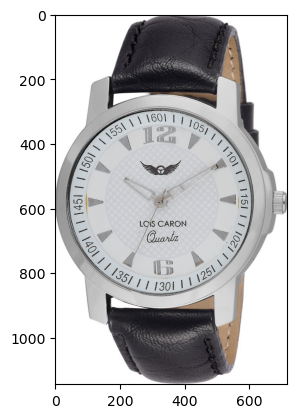

In [51]:
# Importe la fonction imread de la bibliothèque matplotlib.image
from matplotlib.image import imread
# Charge une image à partir du chemin de fichier spécifié
image1 = imread(path+list_imags[453])
# Affiche l'image
plt.imshow(image1)

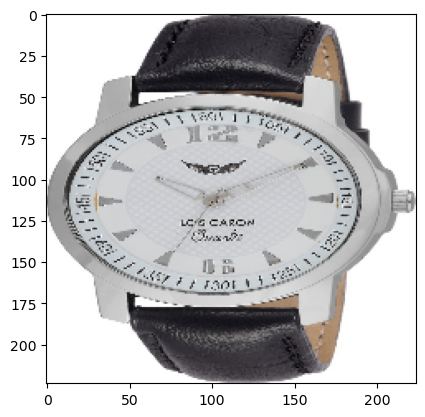

In [52]:
# Importe la bibliothèque OpenCV sous le nom 'cv2'
import cv2
# Redimensionne l'image1 à la taille (224, 224)
image1 = cv2.resize(image1 , (224, 224))
# Affiche l'image redimensionnée
plt.imshow(image1)

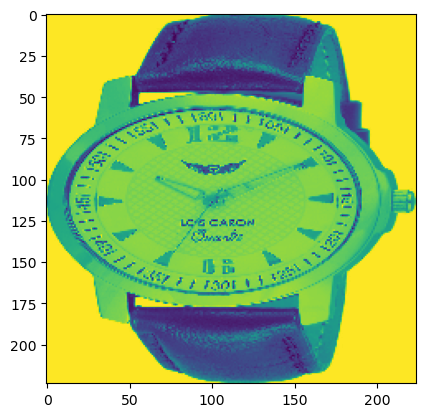

In [53]:
# Convertir l'image de l'espace colorimétrique BGR en espace colorimétrique GRIS
grayimag1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
# Afficher l'image en niveaux de gris
plt.imshow(grayimag1)

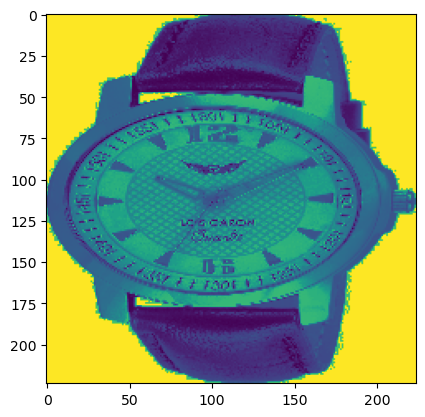

In [54]:
# Égaliser l'histogramme de l'image en niveaux de gris
grayimag1 = cv2.equalizeHist(grayimag1)
# Afficher l'image égalisée
plt.imshow(grayimag1)

#### - Egalisation

In [55]:
# Calcul de l'histogramme de l'image
hist, bins = np.histogram(image1.flatten(), 256, [0,256])
# Calcul de la somme cumulative de l'histogramme (cumulative distribution function - cdf)
cdf = hist.cumsum()
# Normalisation de la somme cumulative pour s'assurer que les valeurs sont dans la plage [0, hist.max()]
cdf_normalized = cdf * hist.max() / cdf.max()

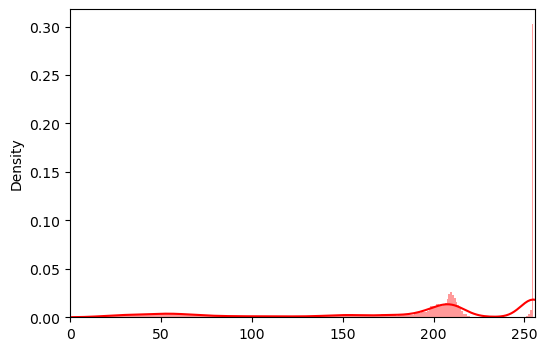

In [56]:
# Crée une nouvelle figure avec une taille de 6 pouces de largeur et 4 pouces de hauteur
plt.figure(figsize=(6,4))
# Utilise Seaborn pour tracer l'histogramme de l'image
sns.distplot(image1.flatten(),256,[0,256], color = 'r')
# Définit la limite des valeurs de l'axe des x entre 0 et 256
plt.xlim([0,256])
# Affiche le graphique
plt.show()

In [57]:
# Crée un tableau masqué en remplaçant les valeurs nulles de la CDF par des masques
cdf_m = np.ma.masked_equal(cdf,0)
# Normalise la CDF masquée pour qu'elle soit dans la plage [0, 255]
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
# Remplit la CDF masquée avec des zéros et la convertit en un tableau d'entiers non signés de 8 bits (uint8)
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [58]:
# Utilise le tableau cdf pour effectuer une opération de correspondance des pixels sur l'image im
im2=cdf[image1]

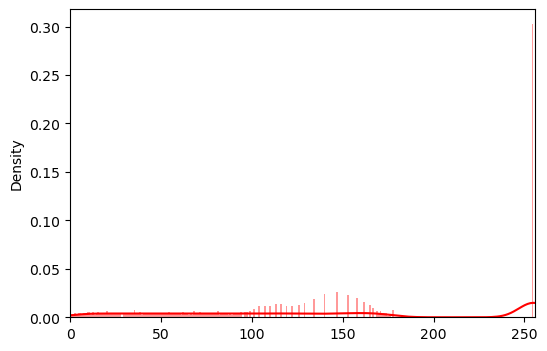

In [59]:
# Crée une nouvelle figure pour afficher le graphique avec une taille de 6 pouces de largeur et 4 pouces de hauteur
plt.figure(figsize=(6,4))
# Utilise Seaborn pour tracer l'histogramme de l'image résultante im2
sns.distplot(im2.flatten(),256,[0,256], color = 'r')
# Définit la limite des valeurs de l'axe des x entre 0 et 256
plt.xlim([0,256])
# Affiche le graphique
plt.show()

#### Extraction des caractéristiques (SIFT)
##### - Essais
#### - SIFT



Ressources : https://docs.opencv.org/3.4/da/df5/tutorial_py_sift_intro.html

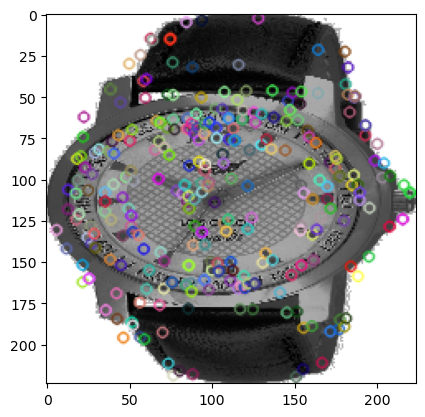

In [60]:
# Crée un objet SIFT (Scale-Invariant Feature Transform)
sift = cv2.SIFT_create()
# Égalise l'histogramme de l'image en niveaux de gris
grayimag1 = cv2.equalizeHist(grayimag1) 
# Utilise l'algorithme SIFT pour détecter et calculer les points d'intérêt (keypoints) et descripteurs (des)
kp, des = sift.detectAndCompute(grayimag1,None)
# Dessine les keypoints sur l'image en niveaux de gris
img1=cv2.drawKeypoints(grayimag1,kp,grayimag1)
# Affiche l'image avec les keypoints dessinés
plt.imshow(img1)

In [61]:
# Affiche la forme (shape) des descripteurs
print("Descripteurs : ", des.shape)

Descripteurs :  (315, 128)


In [62]:
des

array([[12.,  4.,  0., ...,  0.,  0.,  0.],
       [ 5.,  2.,  1., ...,  0.,  0., 11.],
       [ 1.,  3.,  1., ...,  3., 26., 36.],
       ...,
       [34., 32.,  1., ...,  0.,  0.,  0.],
       [54.,  9.,  1., ...,  0.,  0.,  3.],
       [96., 62.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [87]:
# Importation des bibliothèques nécessaires
import cv2
import numpy as np
import time
import os
# Initialisation d'une liste pour stocker les descripteurs SIFT
sift_keypoints = []
# Mesure du temps de début de traitement
temps1 = time.time()
# Création de l'objet SIFT avec une limite de nombre de keypoints (nfeatures) définie à 500
sift = cv2.SIFT_create(nfeatures=500)

# Définir la forme cible pour tous les descripteurs SIFT
target_shape = (500, 128)
# Parcourir les images dans la liste 'list_imags'
for image_num, image_filename in enumerate(list_imags):
    if image_num % 100 == 0:
        print(image_num)
        
# Construire le chemin complet de l'image    
    image_path = os.path.join(path, image_filename)
    if not os.path.exists(image_path): # Vérifier si le fichier image existe
        print(f": image {image_path} .")
        continue
        
# Lire l'image en niveaux de gris
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:  # Vérifier si l'image a été correctement lue
        print(f": image {image_path}.")
        continue
        
# Égaliser l'histogramme de l'image pour améliorer le contraste
    res = cv2.equalizeHist(image)
 # Utiliser l'algorithme SIFT pour détecter et calculer les keypoints et descripteurs    
    kp, des = sift.detectAndCompute(res, None)

    # Redimensionner les descripteurs pour qu'ils aient la même forme
    if des is not None:
        if des.shape[0] < target_shape[0]:
            des = np.vstack((des, np.zeros((target_shape[0] - des.shape[0], target_shape[1]), dtype=np.float32)))
        elif des.shape[0] > target_shape[0]:
            des = des[:target_shape[0], :]
            
# Ajouter les descripteurs à la liste
    sift_keypoints.append(des)
    
# Convertir la liste en un tableau numpy
sift_keypoints_by_img = np.asarray(sift_keypoints)
# Concaténer tous les descripteurs en un seul tableau
sift_keypoints_all = np.concatenate(sift_keypoints_by_img, axis=0)

# Afficher le nombre total de descripteurs calculés
print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

# Mesurer le temps total de traitement
duration1 = time.time() - temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
600
700
800
: image ../Classifiez automatiquement des biens de consommation/Images/.ipynb_checkpoints.
900
1000
: image ../Classifiez automatiquement des biens de consommation/Images/Image.jpg .

Nombre de descripteurs :  (524000, 128)
temps de traitement SIFT descriptor :          2343.30 secondes


In [88]:
# Création des clusters de descripteurs

# Importation des bibliothèques nécessaires
from sklearn import cluster, metrics

# Mesure du temps de début de traitement
temps1=time.time()

# Estimation du nombre de clusters à créer (k)
k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Initialisation de l'algorithme de clustering MiniBatchKMeans
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)

# Application de l'algorithme de clustering aux descripteurs
kmeans.fit(sift_keypoints_all)

# Mesure du temps total de traitement de l'algorithme de clustering
duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  724
Création de 724 clusters de descripteurs ...
temps de traitement kmeans :            11.63 secondes


In [89]:
# Mesure du temps de début de traitement
temps1=time.time()

# Définition d'une fonction pour construire un histogramme à partir des descripteurs
def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)   # Attribution de chaque descripteur à un cluster
    hist = np.zeros(len(kmeans.cluster_centers_))  # Initialisation d'un histogramme vide
    nb_des=len(des)  # Nombre de descripteurs
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des  # Calcul de l'histogramme normalisé
    return hist


# Création d'une liste pour stocker les histogrammes de caractéristiques
hist_vectors=[]
# Boucle sur les descripteurs SIFT par image
for i, image_desc in enumerate(sift_keypoints_by_img) :

    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) # Calcul de l'histogramme
    hist_vectors.append(hist)  # Ajout de l'histogramme à la liste (c'est le vecteur de caractéristiques)
    
# Conversion de la liste en une matrice numpy
im_features = np.asarray(hist_vectors)

# Mesure du temps total de création des histogrammes
duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :            10.21 secondes


In [90]:
# Réductions de dimension

# Importation des bibliothèques nécessaires
from sklearn import manifold, decomposition

# Affichage des dimensions du dataset avant la réduction PCA
print("Dimensions dataset avant réduction PCA : ", im_features.shape)
# Initialisation de l'objet PCA avec n_components=0.99
# Cela signifie que PCA va extraire suffisamment de composantes principales pour expliquer 99% de la variance totale.
pca = decomposition.PCA(n_components=0.99)
# Application de PCA aux vecteurs de caractéristiques (histogrammes)
feat_pca= pca.fit_transform(im_features)
# Affichage des dimensions du dataset après la réduction PCA
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1048, 724)
Dimensions dataset après réduction PCA :  (1048, 465)


In [91]:
# Importation des bibliothèques nécessaires
from sklearn import manifold, decomposition

# Création de l'objet t-SNE (t-Distributed Stochastic Neighbor Embedding)
tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca) # Application de t-SNE aux données PCA réduites (feat_pca)

# Création d'un DataFrame Pandas pour stocker les résultats t-SNE
df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
# Ajout d'une colonne 'class' au DataFrame contenant les étiquettes de catégorie (classe) pour chaque image
df_tsne["class"] = df_img["categorie"]
# Affichage des dimensions du DataFrame résultant
print(df_tsne.shape)

(1048, 3)


In [92]:
# Extraction des valeurs uniques de la colonne 'class' du DataFrame df_tsne
df_tsne['class'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

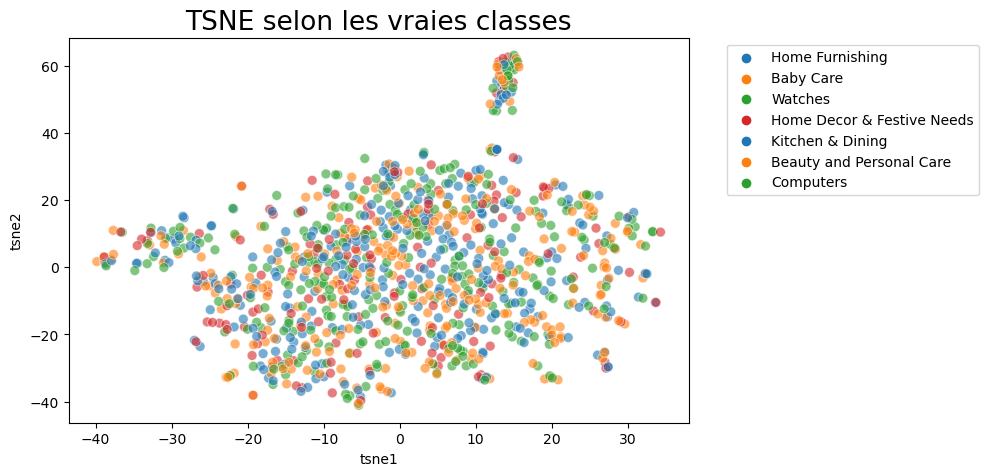

In [93]:
# Création d'une figure avec une taille spécifique
plt.figure(figsize=(8,5))
# Utilisation de Seaborn pour créer un graphique de dispersion (scatter plot)
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6)

# Ajout de titre et d'étiquettes d'axes
plt.title('TSNE selon les vraies classes', fontsize = 19)
plt.xlabel('tsne1')
plt.ylabel('tsne2')
# Affichage de la légende en dehors du graphique pour une meilleure lisibilité
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='best', prop={'size': 10})
# Affichage du graphique
plt.show()

In [94]:
from sklearn import cluster, metrics
# Création d'un objet K-Means avec 7 clusters
cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne) # Application de l'algorithme K-Means aux données t-SNE (X_tsne)
# Ajout d'une nouvelle colonne 'cluster' au DataFrame df_tsne contenant les étiquettes de cluster attribuées à chaque point
df_tsne["cluster"] = cls.labels_
# Affichage des dimensions du DataFrame résultant
print(df_tsne.shape)

(1048, 4)


In [95]:
# Affiche les cinq premières lignes du DataFrame df_tsne
df_tsne.head()

,tsne1,tsne2,class,cluster
0,27.191427,-11.506574,Home Furnishing,0
1,-5.597426,4.701498,Baby Care,2
2,6.026667,-11.004854,Baby Care,0
3,6.491483,9.664796,Home Furnishing,3
4,2.260098,-19.568384,Home Furnishing,0
...,...,...,...,...
1043,17.092245,16.746643,Baby Care,5
1044,27.183460,-0.187455,Baby Care,5
1045,-17.161406,-15.194085,Baby Care,4
1046,8.238721,15.302025,Baby Care,3


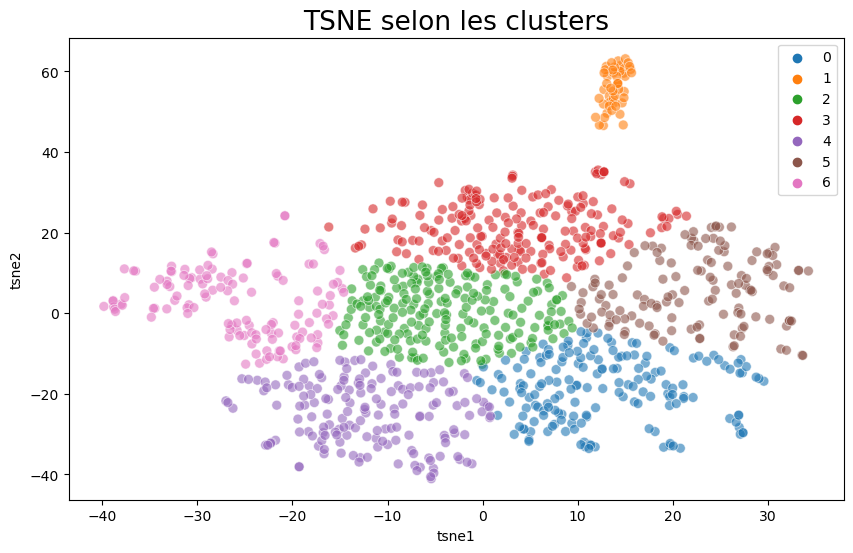

ARI :  1.0


In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Crée une figure avec une taille spécifique
plt.figure(figsize=(10, 6))
# Utilise Seaborn pour créer un graphique de dispersion
sns.scatterplot(
    x="tsne1", y="tsne2",  
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

# Ajoute un titre et des étiquettes d'axes au graphique
plt.title('TSNE selon les clusters', fontsize=19)
plt.xlabel('tsne1')
plt.ylabel('tsne2')

# Affiche la légende en dehors du graphique pour une meilleure lisibilité
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='best', prop={'size': 10})
# Affiche le graphique
plt.show()
# Calcule et affiche l'indice d'ajustement Rand (ARI)
print("ARI : ", metrics.adjusted_rand_score(df_tsne["cluster"], cls.labels_))


In [97]:
# labels = df_tsne['class']
# labels

In [98]:
# Regroupe les données du DataFrame df_tsne par cluster et compte le nombre de points dans chaque cluster
df_tsne.groupby("cluster").count()["class"]

cluster
0    170
1     48
2    203
3    201
4    166
5    133
6    127
Name: class, dtype: int64

In [99]:
# Récupère les étiquettes de classe réelles du DataFrame df_img
labels = df_img["labels"]
# Génère la matrice de confusion en comparant les étiquettes de cluster avec les étiquettes de classe d'origine
conf_mat = metrics.confusion_matrix(df_tsne["cluster"], cls.labels_)
# Affiche la matrice de confusion
print(conf_mat)

[[170   0   0   0   0   0   0]
 [  0  48   0   0   0   0   0]
 [  0   0 203   0   0   0   0]
 [  0   0   0 201   0   0   0]
 [  0   0   0   0 166   0   0]
 [  0   0   0   0   0 133   0]
 [  0   0   0   0   0   0 127]]


In [100]:
# Fonction pour transformer les étiquettes de cluster en utilisant la matrice de confusion
def conf_mat_transform(y_true,y_pred) :
# Calcule la matrice de confusion entre les étiquettes de cluster réelles (y_true) et les étiquettes prédites (y_pred)    
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
# Trouve la correspondance optimale entre les clusters prédits et les classes réelles    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters : ", corresp)
    
    # Applique la correspondance à l'ensemble des étiquettes prédites pour obtenir les nouvelles étiquettes transformées
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

# Applique la fonction de transformation aux étiquettes de cluster prédites par K-Means
cls_labels_transform = conf_mat_transform(df_tsne["cluster"], cls.labels_)

# Recalcule la matrice de confusion avec les étiquettes transformées
conf_mat = metrics.confusion_matrix(df_tsne["cluster"], cls_labels_transform)
# Affiche la nouvelle matrice de confusion
print(conf_mat)
print()
# Affiche un rapport de classification pour évaluer la performance de la transformation
print(metrics.classification_report(df_tsne["cluster"], cls_labels_transform))

Correspondance des clusters :  [0 1 2 3 4 5 6]
[[170   0   0   0   0   0   0]
 [  0  48   0   0   0   0   0]
 [  0   0 203   0   0   0   0]
 [  0   0   0 201   0   0   0]
 [  0   0   0   0 166   0   0]
 [  0   0   0   0   0 133   0]
 [  0   0   0   0   0   0 127]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00       203
           3       1.00      1.00      1.00       201
           4       1.00      1.00      1.00       166
           5       1.00      1.00      1.00       133
           6       1.00      1.00      1.00       127

    accuracy                           1.00      1048
   macro avg       1.00      1.00      1.00      1048
weighted avg       1.00      1.00      1.00      1048



<Axes: >

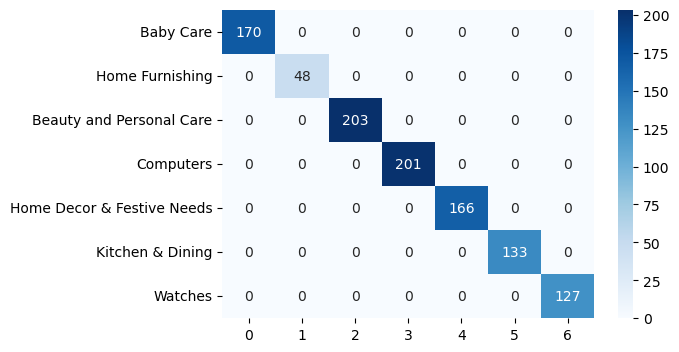

In [101]:
# Création d'un DataFrame à partir de la matrice de confusion avec des étiquettes pour les lignes et les colonnes
df_cm = pd.DataFrame(conf_mat, index = [label for label in l_cat],
                  columns = [i for i in "0123456"])
# Création d'une figure pour la heatmap
plt.figure(figsize = (6,4))
# Création de la heatmap à partir du DataFrame avec des annotations et une colormap "Blues"
sns.heatmap(df_cm, annot=True, cmap="Blues",fmt=".0f")

### VGG16
( VGG16 est une architecture de réseau de neurones convolutionnels (CNN) très populaire et largement utilisée dans le domaine de la vision par ordinateur et de la reconnaissance d'images. Il a été développé par l'équipe Visual Geometry Group (VGG) à l'Université d'Oxford.)

In [102]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout 
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

In [103]:
# Création d'un modèle VGG16 pré-entraîné
base_model = VGG16()
# Création d'un modèle personnalisé en utilisant une partie du modèle VGG16
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)
# Affichage du résumé du modèle personnalisé
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [104]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [105]:
# Création des features des images

# Une liste pour stocker les caractéristiques des images
images_features = []
i=0   # Un compteur pour suivre le progrès du traitement des images

# Boucle à travers chaque chemin de fichier d'image dans le DataFrame df_img
for image_file in df_img["image"] :
    if i%100 == 0 : 
        print(i) # Affiche le numéro de l'image en cours de traitement tous les 100 images
    i +=1
    
    # Chargement de l'image et prétraitement
    image = load_img(image_file, target_size=(224, 224))  # Charge l'image et la redimensionne à 224x224 pixels
    image = img_to_array(image) # Convertit l'image en tableau numpy
    image = np.expand_dims(image, axis=0) # Ajoute une dimension pour correspondre à l'entrée du modèle
    image = preprocess_input(image) # Effectue un prétraitement spécifique au modèle
    # Prédiction des caractéristiques de l'image à l'aide du modèle pré-entraîné
    images_features.append(model.predict(image, verbose=0)[0]) # predict from pretrained model
# Convertit la liste des caractéristiques en un tableau numpy
images_features = np.asarray(images_features)
# Affiche la forme du tableau des caractéristiques (nombre d'images x dimension des caractéristiques)
images_features.shape

0
100
200
300
400
500
600
700
800
900
1000


(1050, 4096)

### Réduction dimension

#### 1 PCA

In [106]:
# Affichage de la forme (dimensions) des données originales
print(images_features.shape)
# Création d'un objet PCA avec une variance expliquée minimale de 99%
pca = decomposition.PCA(n_components=0.99)
# Réduction de la dimensionnalité des données en utilisant PCA
feat_pca= pca.fit_transform(images_features)
# Affichage de la forme (dimensions) des données après la réduction de dimension
print(feat_pca.shape)

(1050, 4096)
(1050, 803)


In [107]:
# Enregistrement du temps de début
temps1 = time.time()

# Création d'un objet t-SNE avec les paramètres spécifiés
tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)

# Application de t-SNE aux données
X_tsne = tsne.fit_transform(feat_pca)

# Calcul de la durée du processus de t-SNE
duration1=time.time()-temps1
# Affichage du temps écoulé
print("temps de T-SNE : ", "%15.2f" % duration1, "secondes")

temps de T-SNE :            12.78 secondes


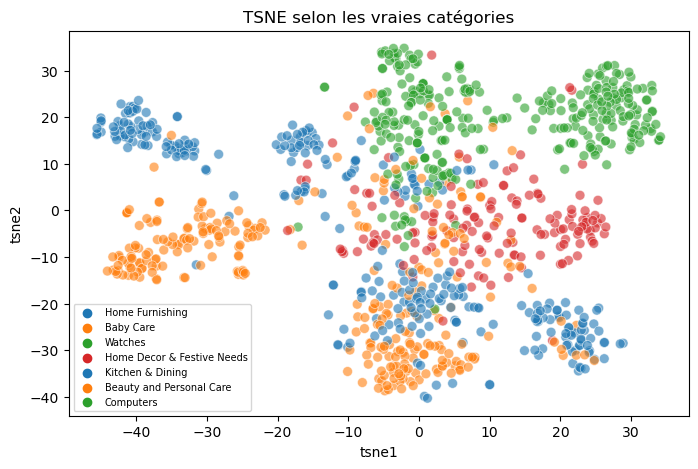

In [108]:
# Création d'un DataFrame avec les coordonnées t-SNE et les vraies catégories
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne["class"] = df_img["categorie"]
# Création d'une figure pour la visualisation
plt.figure(figsize=(8,5))

# Création d'un nuage de points (scatterplot) en utilisant les données de df_tsne
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="class",
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

# Ajout d'un titre et des étiquettes d'axe   
plt.title('TSNE selon les vraies catégories')
plt.xlabel('tsne1')
plt.ylabel('tsne2')

# Affichage de la légende
plt.legend(prop={'size': 7}) 

# Affichage de la visualisation
plt.show()

In [109]:
# Affiche les cinq premières lignes du DataFrame df_tsne
df_tsne.head()

,tsne1,tsne2,class
0,19.755939,-22.730385,Home Furnishing
1,4.525960,-20.804766,Baby Care
2,-1.760395,-22.044895,Baby Care
3,17.481241,-29.700123,Home Furnishing
4,26.153986,-28.387079,Home Furnishing
...,...,...,...
1045,20.096704,-23.780687,Baby Care
1046,5.823454,-4.961089,Baby Care
1047,15.988759,-16.748398,Baby Care
1048,6.381734,-6.054785,Baby Care


#### 2 T-SNE

In [110]:
# Création d'un objet KMeans avec 7 clusters et 100 initialisations aléatoires
cls = cluster.KMeans(n_clusters=7, n_init=100)
# Entraînement du modèle KMeans sur les données X_tsne
cls.fit(X_tsne)

KMeans(n_clusters=7, n_init=100)

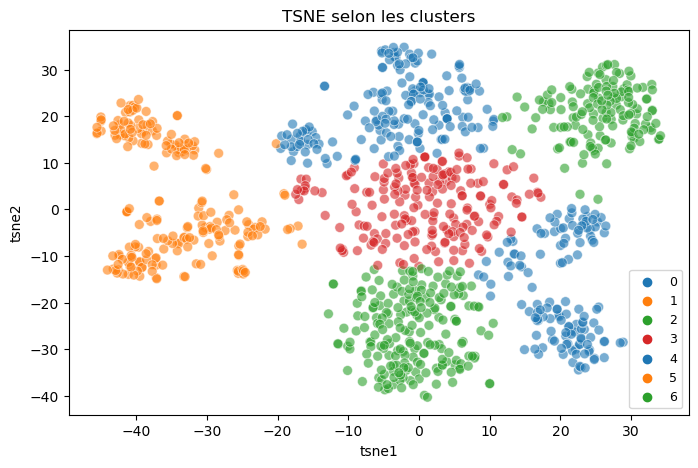

ARI :  0.45187614457477937


In [111]:
# Attribution des labels de clusters résultants aux données dans le DataFrame df_tsne
df_tsne["cluster"] = cls.labels_

# Création d'une figure pour la visualisation
plt.figure(figsize=(8,5))
# Création d'un nuage de points (scatterplot) en utilisant les données de df_tsne
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

# Ajout d'un titre et des étiquettes d'axe
plt.title('TSNE selon les clusters')
plt.xlabel('tsne1')
plt.ylabel('tsne2')

# Affichage de la légende
plt.legend(prop={'size': 9}) 

# Affichage de la visualisation
plt.show()

# Calcul de l'indice d'ajustement Rand (ARI) pour évaluer la qualité du clustering
labels1 = df_img["labels"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

In [112]:
# Affiche les cinq premières lignes du DataFrame df_tsne
df_tsne.head()

,tsne1,tsne2,class,cluster
0,19.755939,-22.730385,Home Furnishing,0
1,4.525960,-20.804766,Baby Care,2
2,-1.760395,-22.044895,Baby Care,2
3,17.481241,-29.700123,Home Furnishing,0
4,26.153986,-28.387079,Home Furnishing,0
...,...,...,...,...
1045,20.096704,-23.780687,Baby Care,0
1046,5.823454,-4.961089,Baby Care,3
1047,15.988759,-16.748398,Baby Care,0
1048,6.381734,-6.054785,Baby Care,3


In [113]:
# Regroupement par la colonne "cluster" et comptage des occurrences de chaque classe
df_tsne.groupby("cluster").count()["class"]

cluster
0    135
1    127
2    200
3    193
4    171
5     81
6    143
Name: class, dtype: int64

In [114]:
# Regroupement par la colonne "class" et comptage des occurrences de chaque classe
df_tsne.groupby("class").count()["cluster"]

class
Baby Care                     150
Beauty and Personal Care      150
Computers                     150
Home Decor & Festive Needs    150
Home Furnishing               150
Kitchen & Dining              150
Watches                       150
Name: cluster, dtype: int64

In [115]:
# Calcul de la matrice de confusion en comparant les étiquettes réelles (labels) aux étiquettes prédites par le modèle (cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
# Affichage de la matrice de confusion
print(conf_mat)

[[  9   3 110  25   1   1   1]
 [  6 117   5  13   8   1   0]
 [  0   1   1  37 110   0   1]
 [ 54   1   4  80   5   0   6]
 [ 66   0  79   5   0   0   0]
 [  0   5   1  31  34  79   0]
 [  0   0   0   2  13   0 135]]


In [116]:
# Transformation des étiquettes prédites en fonction des classes réelles
cls_labels_transform = conf_mat_transform(labels, cls.labels_)
# Calcul de la matrice de confusion
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
# Affichage de la matrice de confusion
print(conf_mat)
#print()
# Affichage du rapport de classification
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [4 1 0 3 2 5 6]
[[110   3   1  25   9   1   1]
 [  5 117   8  13   6   1   0]
 [  1   1 110  37   0   0   1]
 [  4   1   5  80  54   0   6]
 [ 79   0   0   5  66   0   0]
 [  1   5  34  31   0  79   0]
 [  0   0  13   2   0   0 135]]

              precision    recall  f1-score   support

           0       0.55      0.73      0.63       150
           1       0.92      0.78      0.84       150
           2       0.64      0.73      0.69       150
           3       0.41      0.53      0.47       150
           4       0.49      0.44      0.46       150
           5       0.98      0.53      0.68       150
           6       0.94      0.90      0.92       150

    accuracy                           0.66      1050
   macro avg       0.71      0.66      0.67      1050
weighted avg       0.71      0.66      0.67      1050



<Axes: >

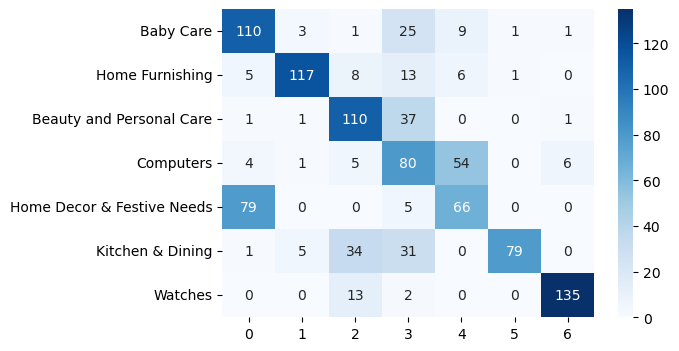

In [117]:
# Création d'un DataFrame à partir de la matrice de confusion
df_cm = pd.DataFrame(conf_mat, index = [label for label in l_cat],
                  columns = [i for i in "0123456"])
# Création d'une figure pour afficher la carte de chaleur
plt.figure(figsize = (6,4))
# Création de la carte de chaleur (heatmap) à partir du DataFrame
sns.heatmap(df_cm, annot=True, cmap="Blues",fmt=".0f")

In [118]:
# Analyse d'images "Baby Care" affectées au cluster 0 "Home Decor & Festive Needs"
# La variable "list_0" contiendra les indices des images qui satisfont les conditions spécifiées.
list_0 = [i for i in range(len(df_img["image"])) \
                if (df_tsne.iloc[i]['class']=='Baby Care') and (df_tsne.iloc[i]['cluster']==0)]
# Affichage de la liste des indices des images satisfaisant les conditions
list_0

[904, 908, 967, 968, 970, 971, 1041, 1045, 1047]

tsne1      -0.022256
tsne2     -12.196366
class      Baby Care
cluster            3
Name: 79, dtype: object


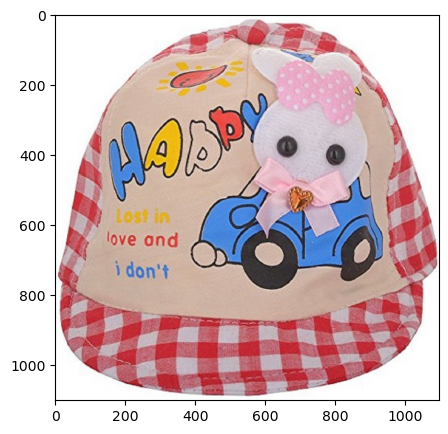

In [119]:
# Définition d'une variable "id" avec une valeur spécifique
id = 79
# Affichage de la ligne du DataFrame "df_tsne" correspondant à l'index spécifié par "id"
print(df_tsne.iloc[id])
fig = plt.figure(figsize = (8, 5)) # Création d'une figure pour afficher l'image
# plt.subplot(130 + 1 + i)
filename = df_img["image"][id]  # Obtention du nom de fichier de l'image à partir du DataFrame "df_img" à l'index "id"
image = imread(filename) # Chargement de l'image à partir du fichier spécifié
plt.imshow(image) # Affichage de l'image
plt.show() # Affichage de la figure

In [120]:
# Analyse d'images "Computers" affectées au cluster 4 "Baby Care"
# La variable "list_1" contiendra les indices des images qui satisfont les conditions spécifiées.

list_1 = [i for i in range(len(df_img["image"])) \
                if (df_tsne.iloc[i]['class']=='Computers') and (df_tsne.iloc[i]['cluster']==4)]
# Affichage de la liste des indices des images satisfaisant les conditions
list_1

[47,
 115,
 122,
 296,
 310,
 312,
 318,
 321,
 323,
 324,
 326,
 327,
 329,
 330,
 332,
 333,
 335,
 336,
 339,
 341,
 345,
 348,
 349,
 350,
 351,
 352,
 353,
 355,
 364,
 367,
 369,
 371,
 373,
 379,
 380,
 383,
 390,
 391,
 394,
 397,
 398,
 399,
 400,
 403,
 407,
 410,
 413,
 419,
 420,
 421,
 425,
 427,
 429,
 431,
 432,
 433,
 434,
 435,
 445,
 446,
 447,
 458,
 479,
 480,
 481,
 482,
 483,
 484,
 485,
 486,
 487,
 488,
 489,
 490,
 491,
 492,
 493,
 504,
 506,
 507,
 508,
 511,
 512,
 589,
 598,
 604,
 605,
 643,
 733,
 800,
 803,
 828,
 829,
 831,
 841,
 842,
 844,
 847,
 848,
 854,
 857,
 860,
 861,
 864,
 1018,
 1019,
 1021,
 1023,
 1028,
 1034]

tsne1      -3.997828
tsne2      15.650405
class      Computers
cluster            4
Name: 643, dtype: object


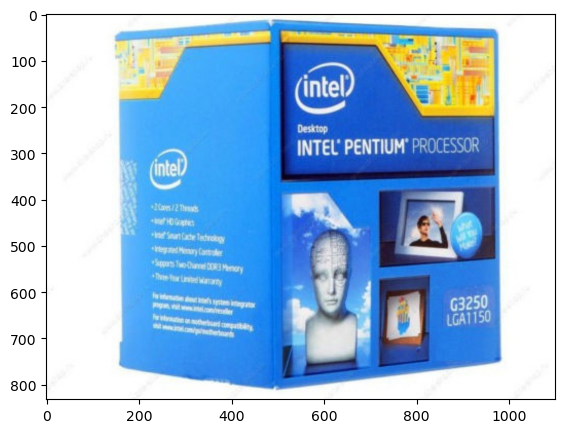

In [121]:
id = 643 # Définition d'une variable "id" avec une valeur spécifique
print(df_tsne.iloc[id]) # Affichage de la ligne du DataFrame "df_tsne" correspondant à l'index spécifié par "id"
fig = plt.figure(figsize = (8, 5)) # Création d'une figure pour afficher l'image
# plt.subplot(130 + 1 + i)

# Obtention du nom de fichier de l'image à partir du DataFrame "df_img" à l'index "id"
filename = df_img["image"][id] 
image = imread(filename) # Chargement de l'image à partir du fichier spécifié
plt.imshow(image) # Affichage de l'image
plt.show() # Affichage de la figure

In [122]:
# Extraction d'un sous-ensemble de colonnes du DataFrame df
df_cnn = df.iloc[:,[0,2]]
# Affichage ou retourne le DataFrame résultant df_cnn
df_cnn

,uniq_id,product_url
0,55b85ea15a1536d46b7190ad6fff8ce7,http://www.flipkart.com/elegance-polyester-mul...
1,7b72c92c2f6c40268628ec5f14c6d590,http://www.flipkart.com/sathiyas-cotton-bath-t...
2,64d5d4a258243731dc7bbb1eef49ad74,http://www.flipkart.com/eurospa-cotton-terry-f...
3,d4684dcdc759dd9cdf41504698d737d8,http://www.flipkart.com/santosh-royal-fashion-...
4,6325b6870c54cd47be6ebfbffa620ec7,http://www.flipkart.com/jaipur-print-cotton-fl...
...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,http://www.flipkart.com/oren-empower-extra-lar...
1046,fd6cbcc22efb6b761bd564c28928483c,http://www.flipkart.com/wallmantra-large-vinyl...
1047,5912e037d12774bb73a2048f35a00009,http://www.flipkart.com/uberlyfe-extra-large-p...
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,http://www.flipkart.com/wallmantra-medium-viny...


In [126]:
# Sauvegarde du DataFrame df_cnn dans un fichier CSV
df_cnn = df_cnn.to_csv('df_cnn.csv',index=False)

In [127]:
# Extraction d'un sous-ensemble de colonnes du DataFrame df
df_img_cnn = df.iloc[:, [0,2]]
# Affichage ou retourne le DataFrame résultant df_img_cnn
df_img_cnn

,uniq_id,product_url
0,55b85ea15a1536d46b7190ad6fff8ce7,http://www.flipkart.com/elegance-polyester-mul...
1,7b72c92c2f6c40268628ec5f14c6d590,http://www.flipkart.com/sathiyas-cotton-bath-t...
2,64d5d4a258243731dc7bbb1eef49ad74,http://www.flipkart.com/eurospa-cotton-terry-f...
3,d4684dcdc759dd9cdf41504698d737d8,http://www.flipkart.com/santosh-royal-fashion-...
4,6325b6870c54cd47be6ebfbffa620ec7,http://www.flipkart.com/jaipur-print-cotton-fl...
...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,http://www.flipkart.com/oren-empower-extra-lar...
1046,fd6cbcc22efb6b761bd564c28928483c,http://www.flipkart.com/wallmantra-large-vinyl...
1047,5912e037d12774bb73a2048f35a00009,http://www.flipkart.com/uberlyfe-extra-large-p...
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,http://www.flipkart.com/wallmantra-medium-viny...


In [128]:
# Sauvegarde du DataFrame df_img_cnn dans un fichier CSV
df_img_cnn.to_csv('df_img_cnn.csv', index=False)